Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1341 non-null   object 
 1   TIME         1341 non-null   int64  
 2   PC_HEALTHXP  1341 non-null   float64
 3   PC_GDP       1341 non-null   float64
 4   USD_CAP      1341 non-null   float64
 5   TOTAL_SPEND  1341 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 63.0+ KB
None

Описательная статистика:
              TIME  PC_HEALTHXP       PC_GDP      USD_CAP    TOTAL_SPEND
count  1341.000000  1341.000000  1341.000000  1341.000000    1341.000000
mean   2001.134228    16.632877     1.215524   338.278398   14439.322088
std      14.093659     6.613320     0.479568   226.158326   43259.358895
min    1970.000000     5.545000     0.207000     3.628000       5.810000
25%    1990.000000    11.849000     0.802000   144.592000     756.280000
50%  

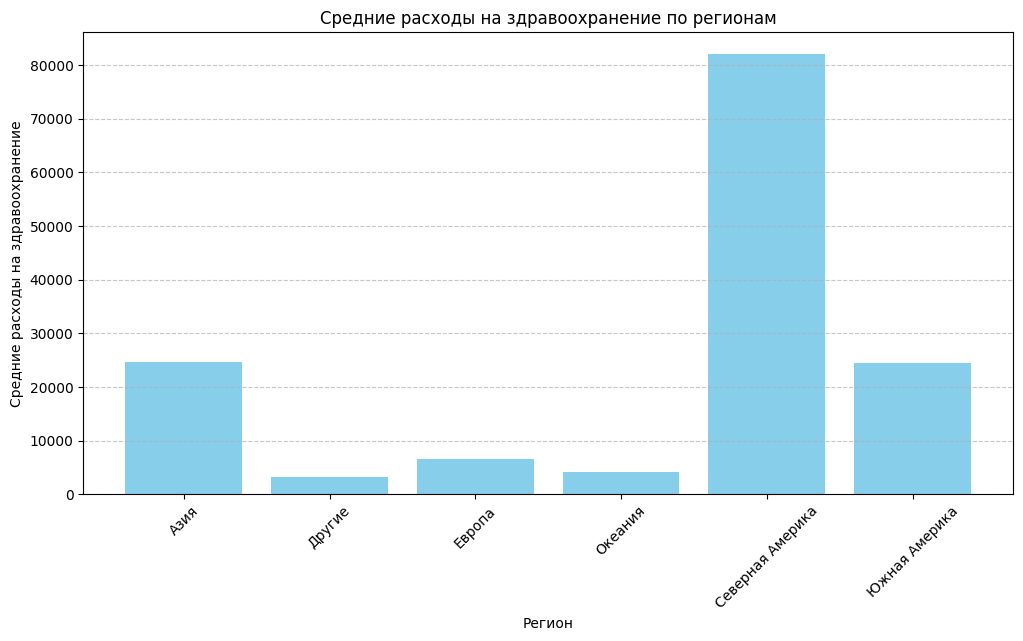

Обработка стран: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 404.28it/s]


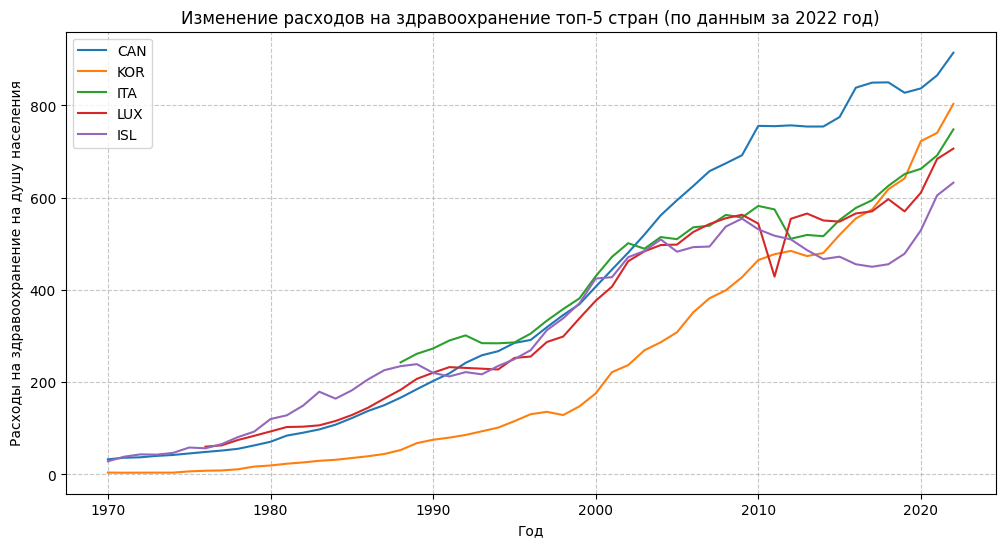

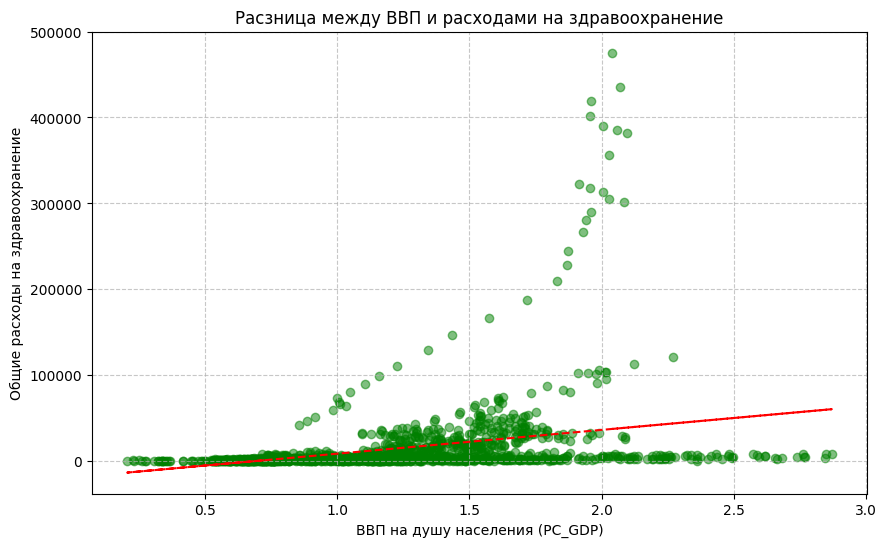

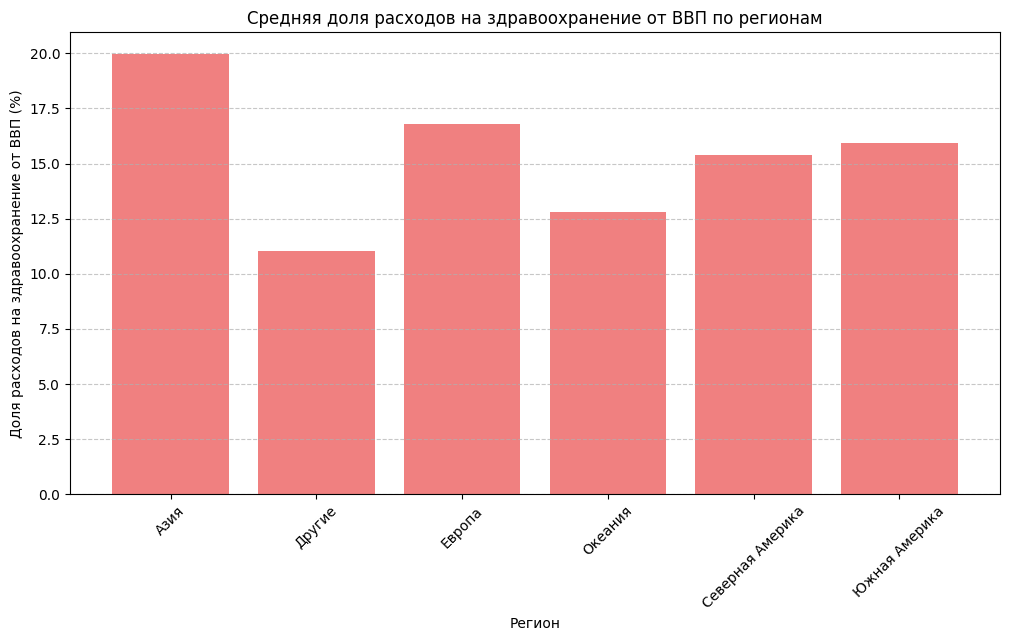

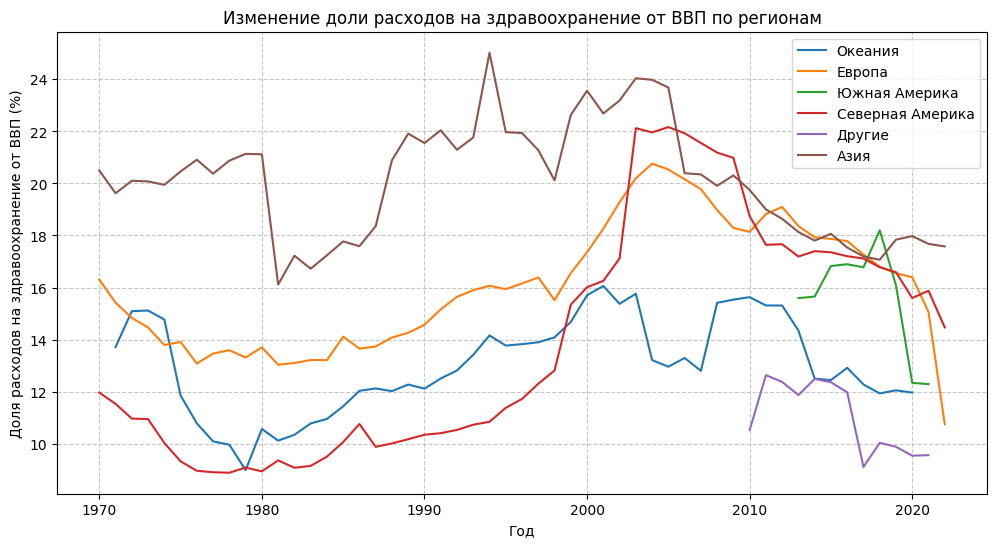

In [5]:
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")

print("Информация о данных:")
print(df.info())
print("\nОписательная статистика:")
print(df.describe())

region_mapping = {
    "Северная Америка": ["USA", "CAN", "MEX"],
    "Европа": ["AUT", "BEL", "BGR", "CYP", "CZE", "DEU", "DNK", "ESP", "EST", "FIN", "FRA",  "GBR", "GRC", "HRV", "HUN", "IRL", "ISL", "ITA", "LTU", "LUX", "LVA", "MLT",  "NLD", "NOR", "POL", "PRT", "ROU", "SVK", "SVN", "SWE"],
    "Азия": ["JPN", "KOR", "TUR", "ISR"],
    "Океания": ["AUS", "NZL"],
    "Южная Америка": ["BRA", "CHL", "COL"],
    "Африка": []
}

def get_region(country_code):
    for region, codes in region_mapping.items():
        if country_code in codes:
            return region
    return "Другие"

df["Region"] = df["LOCATION"].apply(get_region)

# 1. График средних расходов на здравоохранение по регионам
plt.figure(figsize=(12, 6))
region_spending = df.groupby("Region")["TOTAL_SPEND"].mean().reset_index()
plt.bar(region_spending["Region"], region_spending["TOTAL_SPEND"], color='skyblue')
plt.xlabel("Регион")
plt.ylabel("Средние расходы на здравоохранение")
plt.title("Средние расходы на здравоохранение по регионам")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Топ-5 стран по расходам на здравоохранение на душу населения
latest_year = df["TIME"].max()
latest_data = df[df["TIME"] == latest_year]
top_countries = latest_data.nlargest(5, "USD_CAP")["LOCATION"].tolist()
df_top = df[df["LOCATION"].isin(top_countries)]

# График изменения расходов на здравоохранение на душу населения во времени
plt.figure(figsize=(12, 6))
for country in tqdm(top_countries, desc="Обработка стран"):
    country_data = df_top[df_top["LOCATION"] == country]
    plt.plot(country_data["TIME"], country_data["USD_CAP"], label=country)

plt.xlabel("Год")
plt.ylabel("Расходы на здравоохранение на душу населения")
plt.title(f"Изменение расходов на здравоохранение топ-5 стран (по данным за {latest_year} год)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 3. Разница между расходами на здравоохранение и ВВП
plt.figure(figsize=(10, 6))
plt.scatter(df["PC_GDP"], df["TOTAL_SPEND"], alpha=0.5, color='green')
plt.xlabel("ВВП на душу населения (PC_GDP)")
plt.ylabel("Общие расходы на здравоохранение")
plt.title("Расзница между ВВП и расходами на здравоохранение")
plt.grid(True, linestyle='--', alpha=0.7)

# Добавим линию тренда
z = np.polyfit(df["PC_GDP"], df["TOTAL_SPEND"], 1)
p = np.poly1d(z)
plt.plot(df["PC_GDP"], p(df["PC_GDP"]), "r--")

plt.show()

# 4. График распределения доли расходов на здравоохранение от ВВП по регионам
plt.figure(figsize=(12, 6))
region_healthxp = df.groupby("Region")["PC_HEALTHXP"].mean().reset_index()
plt.bar(region_healthxp["Region"], region_healthxp["PC_HEALTHXP"], color='lightcoral')
plt.xlabel("Регион")
plt.ylabel("Доля расходов на здравоохранение от ВВП (%)")
plt.title("Средняя доля расходов на здравоохранение от ВВП по регионам")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. Изменение доли расходов на здравоохранение от ВВП во времени для разных регионов
plt.figure(figsize=(12, 6))
for region in df["Region"].unique():
    region_data = df[df["Region"] == region]
    region_avg = region_data.groupby("TIME")["PC_HEALTHXP"].mean().reset_index()
    plt.plot(region_avg["TIME"], region_avg["PC_HEALTHXP"], label=region)

plt.xlabel("Год")
plt.ylabel("Доля расходов на здравоохранение от ВВП (%)")
plt.title("Изменение доли расходов на здравоохранение от ВВП по регионам")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()